In [1]:
import pandas as pd
import base
import os

2024-01-05 04:47:50.741726: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-05 04:47:50.784437: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-05 04:47:50.784475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-05 04:47:50.785462: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-05 04:47:50.792040: I tensorflow/core/platform/cpu_feature_guar

In [3]:
SEED = 42
base.fix_seed(SEED)

desired_directory = '/home/jovyan/work/spectrum/'
os.chdir(desired_directory)

2023-12-26 04:09:58.392204: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-26 04:09:58.428311: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-26 04:09:58.428346: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-26 04:09:58.429247: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-26 04:09:58.435226: I tensorflow/core/platform/cpu_feature_guar

In [4]:
df_neg = pd.read_csv('Data/04_canopus/neg/df_neg_model_canopus_subclass_pred.csv')#.set_index('Subclass')
df_pos = pd.read_csv('Data/04_canopus/pos/df_pos_model_canopus_subclass_pred.csv')#.set_index('Subclass')

In [7]:
df_all_ = pd.concat([df_neg, df_pos])
df_all = df_all_.groupby('Subclass').sum().reset_index()

df_all_merge = df_all.merge(df_neg[['Subclass','Total']].rename(columns={'Total':'Total_neg'}), on='Subclass', how='left').\
merge(df_pos[['Subclass','Total']].rename(columns={'Total':'Total_pos'}), on='Subclass', how='left').fillna(0)[['Total','Total_neg','Total_pos']].astype(int)

sum_list = []
for i in range(len(df_all_merge)):
    if df_all_merge['Total_neg'].iloc[i] == 0:
        sum_list.append(f' (Positive:{df_all_merge.Total_pos.astype(str).iloc[i]})')
    elif df_all_merge['Total_pos'].iloc[i] == 0:
        sum_list.append(f' (Negative:{df_all_merge.Total_neg.astype(str).iloc[i]})')
    else:
        sum_list.append(f' (Negative:{df_all_merge.Total_neg.astype(str).iloc[i]} + Positive:{df_all_merge.Total_pos.astype(str).iloc[i]})')

df_all['Total_all'] = sum_list

In [9]:
df_all = df_all.rename(columns={'Subclass':'class'}).set_index('class')

df_all_2 = pd.DataFrame()
df_all_2['model_correct'] = (df_all['Correct_Predictions']/df_all['Total'])*100
df_all_2['model_mispred'] = 100-df_all_2['model_correct']

df_all_2['canopus_correct'] = (df_all['canopus_corpred']/df_all['Total'])*100
df_all_2['canopus_mispred'] = (df_all['canopus_export']/df_all['Total'] - df_all['canopus_corpred']/df_all['Total'])*100
df_all_2['canopus_notpredict'] = 100-((df_all['canopus_export']/df_all['Total'])*100)
df_all_2

,model_correct,model_mispred,canopus_correct,canopus_mispred,canopus_notpredict
class,,,,,
Ceramides,99.016393,0.983607,51.803279,0.327869,47.868852
Diradylglycerols,97.641509,2.358491,5.660377,1.415094,92.924528
Fatty acids and conjugates,81.818182,18.181818,9.090909,54.545455,36.363636
Glycerophosphocholines,98.370370,1.629630,31.111111,0.888889,68.000000
Glycerophosphoethanolamines,98.859316,1.140684,49.049430,6.083650,44.866920
Glycerophosphoglycerols,97.727273,2.272727,55.681818,0.000000,44.318182
Glycerophosphoinositols,99.324324,0.675676,48.648649,0.000000,51.351351
Glycerophosphoserines,96.202532,3.797468,88.607595,1.265823,10.126582
Glycosphingolipids,97.115385,2.884615,7.692308,0.000000,92.307692


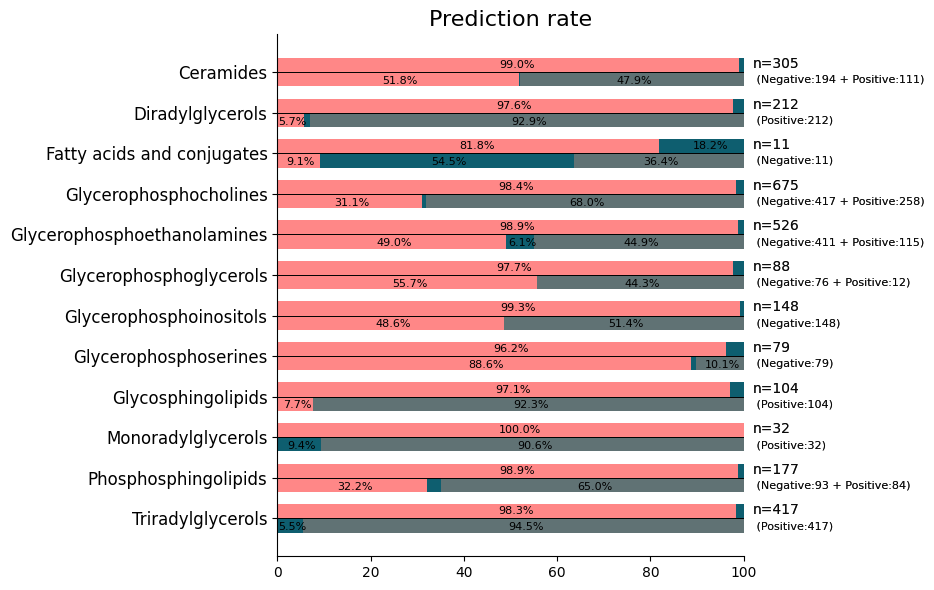

In [10]:
import matplotlib.pyplot as plt
import numpy as np

df_all2 = df_all_2.reset_index().sort_values('class')

# Create a bar chart for model data
fig, ax = plt.subplots(figsize=(9.5, 6))

width = 0.35  # Width of each bar

y = np.arange(len(df_all2['class']))

custom_colors = ['#ff8787','#0e5e6f','#ff8787','#0e5e6f','#607274']  

# Plot model_1st_correct and model_mispredict bars
ax.barh(y - width/2, df_all2['model_correct'], width, label='model_correct', color=custom_colors[0])
ax.barh(y - width/2, df_all2['model_mispred'], width, label='model_mispred', color=custom_colors[1], left=df_all2['model_correct'])
ax.barh(y + width/2, df_all2['canopus_correct'], width, label='canopus_correct', color=custom_colors[2])
ax.barh(y + width/2, df_all2['canopus_mispred'], width, label='canopus_mispred', color=custom_colors[3], left=df_all2['canopus_correct'])
ax.barh(y + width/2, df_all2['canopus_notpredict'], width, label='canopus_notpredict', color=custom_colors[4], left=df_all2['canopus_correct']+df_all2['canopus_mispred'])

#ax.set_ylabel('Class', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Prediction rate', fontsize=16)
ax.set_yticks(y)
ax.set_yticklabels(df_all2['class'], fontsize=10)
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

bars1= df_all2[['model_correct','model_mispred']]
bars2= df_all2[['canopus_correct','canopus_mispred','canopus_notpredict']]

  
for n in bars1:
    for i, (cs, ab, pc, sn, sn2) in enumerate(zip(bars1.iloc[:, 0:].cumsum(1)[n],
                                          bars1[n], bars1[n],df_all['Total'], df_all['Total_all'])):
        if pc > 5.0:  
            plt.text(cs - ab / 2 + 2, i - width/2, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
        plt.text(100 + 2, i-0.2, f'n={sn}', va='center', ha='left', fontsize=10, alpha=0.8)
        plt.text(100 + 2, i+0.2, f'{sn2}', va='center', ha='left', fontsize=8, alpha=0.8)

for n in bars2:
    for i, (cs, ab, pc) in enumerate(zip(bars2.iloc[:, 0:].cumsum(1)[n],
                                          bars2[n], bars2[n])):
        if pc > 5.0:  
            plt.text(cs - ab / 2 + 0.5, i + width/2 + 0.04, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
            

for i in range(len(df_all2)):
    plt.axhline(i, color='black', linewidth=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.gca().invert_yaxis()

plt.legend().set_visible(False)
plt.yticks(size = 12)
plt.tight_layout()
plt.savefig('Data/svg/test/canopus/all_canopus-vs-model_subclass.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()